In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/home/mohammadreza/Kaggle/mobile/train.csv')
test = pd.read_csv('/home/mohammadreza/Kaggle/mobile/test.csv')

In [3]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

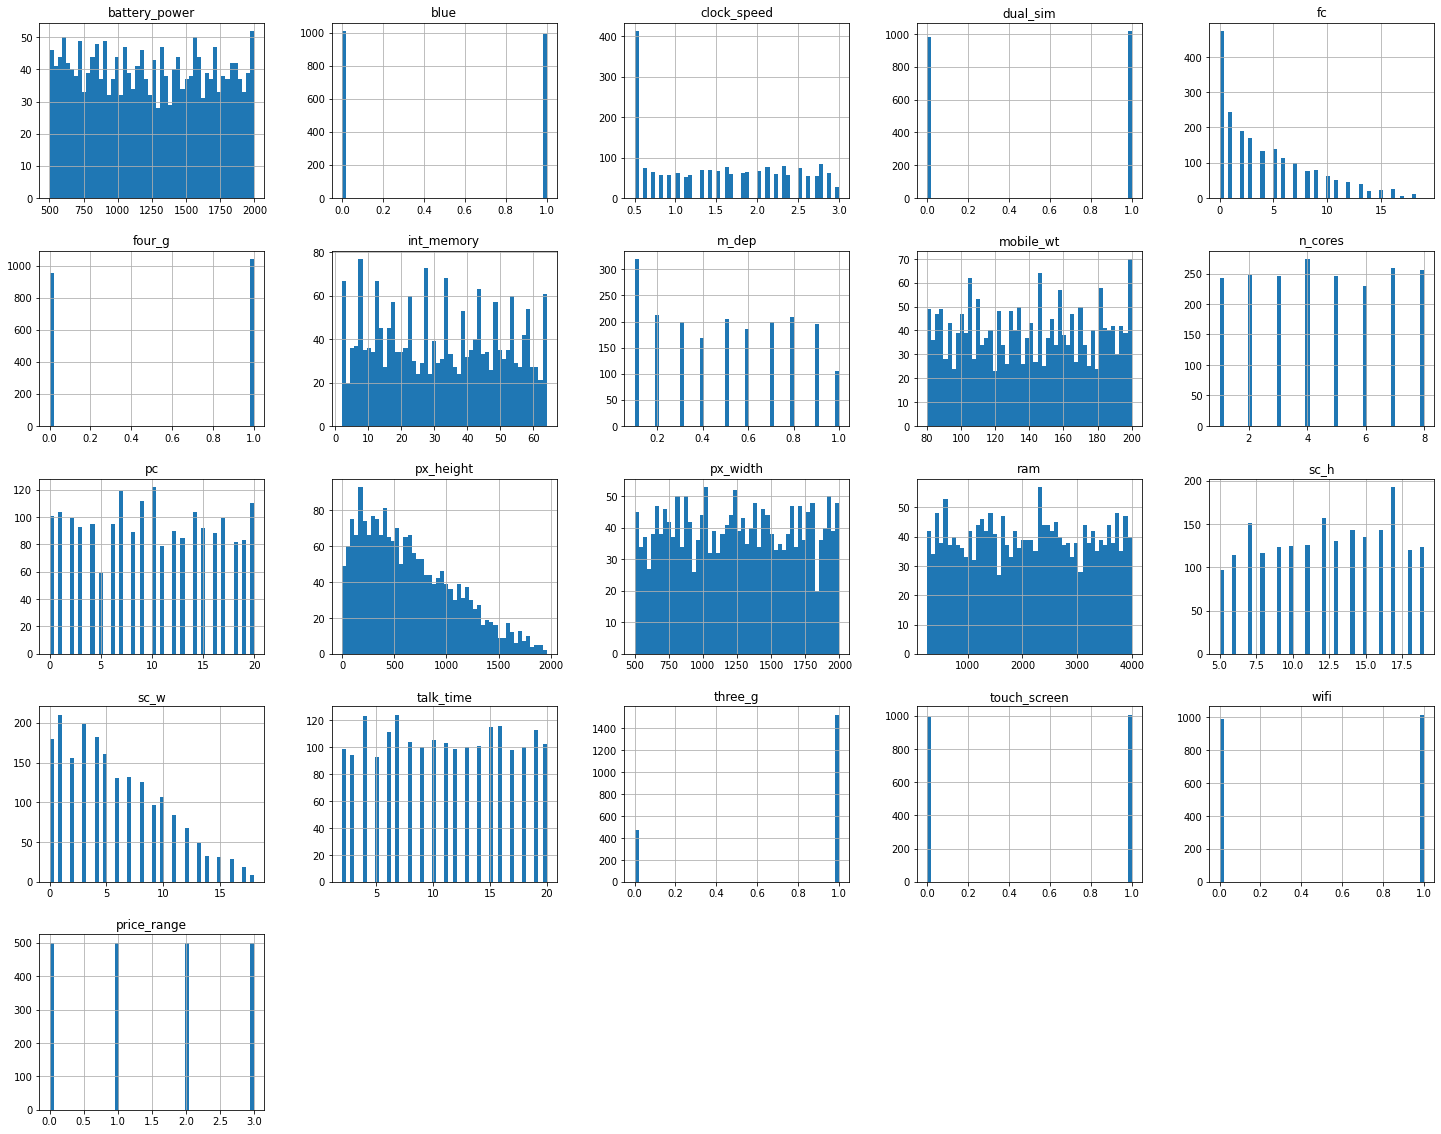

In [8]:
train.hist(bins=50, figsize=(25,20))

In [9]:
corr_matrix=train.corr()
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [10]:
X_train=train.drop(['price_range'], axis=1, inplace=False)
y_train=train['price_range'].copy()

In [11]:
X_train, y_train

(      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0               842     0          2.2         0   1       0           7   
 1              1021     1          0.5         1   0       1          53   
 2               563     1          0.5         1   2       1          41   
 3               615     1          2.5         0   0       0          10   
 4              1821     1          1.2         0  13       1          44   
 ...             ...   ...          ...       ...  ..     ...         ...   
 1995            794     1          0.5         1   0       1           2   
 1996           1965     1          2.6         1   0       0          39   
 1997           1911     0          0.9         1   1       1          36   
 1998           1512     0          0.9         0   4       1          46   
 1999            510     1          2.0         1   5       1          45   
 
       m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_

In [12]:
y_train_3=y_train==3
y_train_3

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997     True
1998    False
1999     True
Name: price_range, Length: 2000, dtype: bool

In [13]:
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)

In [14]:
result_tab=pd.DataFrame({'Model': [],
                           'Accuracy':[],
                           'Precision':[],
                           'Recall':[],
                           'F1':[]})

In [15]:
sgd_cls=SGDClassifier(random_state=42)
sgd_cls.fit(X_train_scale, y_train_3)

SGDClassifier(random_state=42)

In [16]:
X_1=X_train.loc[5]
X_2=X_train.loc[10]
X_1

battery_power    1859.0
blue                0.0
clock_speed         0.5
dual_sim            1.0
fc                  3.0
four_g              0.0
int_memory         22.0
m_dep               0.7
mobile_wt         164.0
n_cores             1.0
pc                  7.0
px_height        1004.0
px_width         1654.0
ram              1067.0
sc_h               17.0
sc_w                1.0
talk_time          10.0
three_g             1.0
touch_screen        0.0
wifi                0.0
Name: 5, dtype: float64

In [17]:
pred_1=sgd_cls.predict([X_1,X_2])
pred_1, y_train_3.loc[5], y_train_3[10]

(array([ True,  True]), False, True)

In [18]:
from sklearn.model_selection import cross_val_score
sgd_score=cross_val_score(sgd_cls, X_train_scale, y_train_3,
                           cv=5, scoring='accuracy')
sgd_accu=sgd_score.mean()
sgd_accu

0.9814999999999999

In [19]:
y_train_pred=cross_val_predict(sgd_cls, X_train_scale, 
                               y_train_3, cv=5)

In [20]:
conf_matrix=confusion_matrix(y_train_pred, y_train_3)
conf_matrix

array([[1488,   25],
       [  12,  475]])

In [21]:
1488+25+12+474 #TN+FP+FN+TP

1999

In [22]:
recall_sgd=recall_score(y_train_3,y_train_pred)
precision_sgd=precision_score(y_train_3,y_train_pred)
recall_sgd,precision_sgd

(0.95, 0.9753593429158111)

In [23]:
y_scores=cross_val_predict(sgd_cls,X_train_scale,y_train_3,
                           cv=5, method='decision_function')

In [24]:
y_scores

array([-47.97368806,  -3.56577303, -16.76579595, ...,  21.5047317 ,
       -71.37877052,   6.39831515])

In [29]:
sgd_cls.decision_function([X_1])

array([65465.74311823])

In [30]:
np.argmax(sgd_cls.decision_function([X_1])), np.argmax(sgd_cls.decision_function([X_2]))

(0, 0)

In [31]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_train_3,y_scores)
precisions, recalls, thresholds

(array([0.94517958, 0.94507576, 0.94686907, 0.94676806, 0.94666667,
        0.94847328, 0.95028681, 0.95210728, 0.95393474, 0.95576923,
        0.95761079, 0.95945946, 0.96131528, 0.96317829, 0.9631068 ,
        0.96303502, 0.96491228, 0.96484375, 0.9667319 , 0.96666667,
        0.96660118, 0.96653543, 0.96646943, 0.96640316, 0.96633663,
        0.96825397, 0.97017893, 0.97011952, 0.97205589, 0.972     ,
        0.97194389, 0.97389558, 0.97384306, 0.97379032, 0.97575758,
        0.9757085 , 0.97565923, 0.97560976, 0.97556008, 0.9755102 ,
        0.97546012, 0.97540984, 0.97535934, 0.97530864, 0.97525773,
        0.97520661, 0.97515528, 0.97717842, 0.97920998, 0.97916667,
        0.98121086, 0.9832636 , 0.98532495, 0.98529412, 0.98526316,
        0.98734177, 0.98731501, 0.98728814, 0.98726115, 0.9893617 ,
        0.98933902, 0.98931624, 0.98929336, 0.99141631, 0.99139785,
        0.99353448, 0.99352052, 0.99350649, 0.99349241, 0.99347826,
        0.99346405, 0.99344978, 0.99343545, 0.99

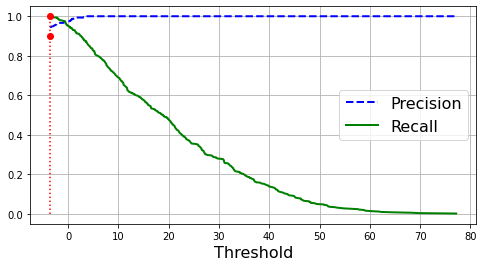

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    #plt.axis([-5, 70, 0, 1.1])


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.99], "r:")
#plt.plot([-4, threshold_90_precision], [0.9, 0.9], "r:")
#plt.plot([-4, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

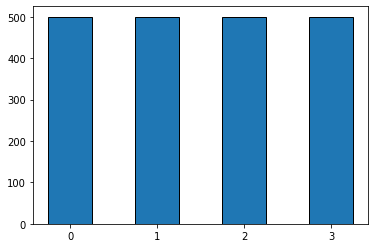

In [33]:
plt.hist(y_train, histtype='bar', bins=[0, 1, 2, 3, 4], ec='black', rwidth=0.5,
         align='left')
plt.xticks(np.arange(0, 4, 1))
plt.show()

In [34]:
from sklearn.metrics import f1_score
f1_sgd=f1_score(y_train_3,y_train_pred)
f1_sgd

0.9625126646403241

In [35]:
row = result_tab.shape[0]
result_tab.loc[row] = ['Binary SGD',sgd_accu,precision_sgd,recall_sgd,f1_sgd]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.95,0.962513


In [36]:
#let's try multi class with OvA default of SGDclassifier
sgd_cls.fit(X_train_scale, y_train)

SGDClassifier(random_state=42)

In [37]:
y_pred=sgd_cls.predict([X_1,X_2])
y_pred, y_train.loc[5], y_train.loc[10]

(array([3, 3]), 1, 3)

In [38]:
sgd_score=cross_val_score(sgd_cls, X_train_scale, y_train, 
                          cv=5, scoring='accuracy')
sgd_accu_multi=sgd_score.mean()
sgd_accu_multi

0.7765000000000001

In [39]:
y_predict=cross_val_predict(sgd_cls,X_train_scale,y_train, cv=5)
y_predict

array([2, 1, 1, ..., 3, 0, 3])

In [40]:
conf_matrix=confusion_matrix(y_train,y_predict)
conf_matrix

array([[482,  12,   6,   0],
       [ 20, 287, 193,   0],
       [  0, 186, 295,  19],
       [  0,   1,  10, 489]])

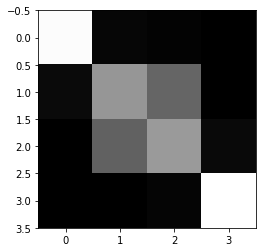

In [41]:
plt.imshow(conf_matrix, cmap=plt.cm.gray) # 0=Black , 1=white

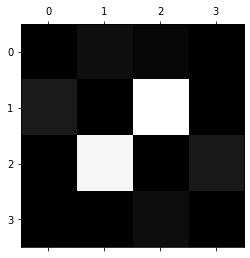

In [42]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)

In [43]:
recall_sgd_multi=recall_score(y_train, y_predict,average='weighted')
precision_sgd_multi=precision_score(y_train, y_predict,average='weighted')
f1_sgd_multi=f1_score(y_train, y_predict,average='weighted')
recall_sgd_multi,precision_sgd_multi,f1_sgd_multi

(0.7765, 0.7746525568719949, 0.7755283618379513)

In [44]:
row = result_tab.shape[0]
result_tab.loc[row] = ['SGDClassifier',sgd_accu_multi,precision_sgd_multi,recall_sgd_multi,f1_sgd_multi]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528


In [86]:
tree_cls=DecisionTreeClassifier(random_state=42)
tree_cls.fit(X_train_scale,y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
tree_cls.predict([X_1,X_2]), y_train.loc[5]

(array([3, 3]), 1)

In [88]:
tree_score=cross_val_score(tree_cls,X_train_scale,y_train, 
                           cv=5, scoring='accuracy')
tree_accu=tree_score.mean()
tree_accu

0.8225

In [94]:
tree_pred=cross_val_predict(tree_cls,X_train_scale,y_train,cv=5)
tree_conf_mx=confusion_matrix(y_train,tree_pred)
tree_conf_mx

array([[445,  55,   0,   0],
       [ 63, 371,  66,   0],
       [  0,  54, 388,  58],
       [  0,   0,  59, 441]])

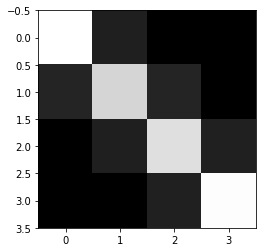

In [95]:
plt.imshow(tree_conf_mx, cmap=plt.cm.gray)

In [96]:
recall_tree=recall_score(y_train,tree_pred,average='weighted')
precision_tree=precision_score(y_train,tree_pred,average='weighted')
f1_tree=f1_score(y_train,tree_pred,average='weighted')
recall_tree, precision_tree,f1_tree

(0.8225, 0.8222509340890958, 0.8222509272422895)

In [100]:
row = result_tab.shape[0]
result_tab.loc[row] = ['DecisionTree',tree_accu,precision_tree,recall_tree,f1_tree]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528
2,DecisionTree,0.8225,0.822251,0.8225,0.822251


In [101]:
forest_cls=RandomForestClassifier(n_estimators=100, random_state=42)
forest_cls.fit(X_train_scale,y_train)

RandomForestClassifier(random_state=42)

In [102]:
forest_cls.predict([X_1,X_2])

array([3, 3])

In [103]:
forest_score=cross_val_score(forest_cls,X_train_scale,y_train, 
                             cv=5, scoring='accuracy')
forest_accu=forest_score.mean()
forest_accu

0.8775000000000001

In [104]:
forest_pred=cross_val_predict(forest_cls,X_train_scale,y_train, cv=5)
forest_conf_mx=confusion_matrix(y_train,forest_pred)
forest_conf_mx==tree_conf_mx
forest_conf_mx, tree_conf_mx

(array([[474,  26,   0,   0],
        [ 42, 418,  40,   0],
        [  0,  59, 405,  36],
        [  0,   0,  42, 458]]),
 array([[445,  55,   0,   0],
        [ 63, 371,  66,   0],
        [  0,  54, 388,  58],
        [  0,   0,  59, 441]]))

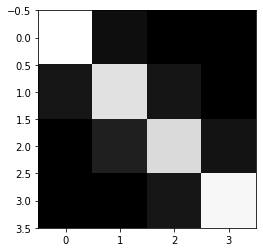

In [144]:
plt.imshow(forest_conf_mx, cmap=plt.cm.gray)

In [105]:
recall_forest=recall_score(y_train,forest_pred,average='weighted')
precision_forest=precision_score(y_train,forest_pred,average='weighted')
f1_forest=f1_score(y_train,forest_pred,average='weighted')
recall_forest, precision_forest, f1_forest

(0.8775, 0.8770915625820087, 0.8771920589241665)

In [106]:
row = result_tab.shape[0]
result_tab.loc[row] = ['RandomForest',forest_accu,precision_forest,recall_forest,f1_forest]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528
2,DecisionTree,0.8225,0.822251,0.8225,0.822251
3,RandomForest,0.8775,0.877092,0.8775,0.877192


In [107]:
# It looks very good model, but let us try the last one, OvO
ovo_cls=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_cls.fit(X_train_scale,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [108]:
ovo_cls.predict([X_1,X_2])

array([3, 3])

In [110]:
ovo_scores=cross_val_score(ovo_cls, X_train_scale,y_train, cv=5, scoring='accuracy')
ovo_accu=ovo_scores.mean()
ovo_accu

0.953

In [111]:
ovo_pred=cross_val_predict(ovo_cls,X_train_scale,y_train, cv=10)
ovo_conf_mx=confusion_matrix(y_train,ovo_pred)
ovo_conf_mx

array([[481,  19,   0,   0],
       [ 10, 465,  25,   0],
       [  0,  22, 468,  10],
       [  0,   0,  18, 482]])

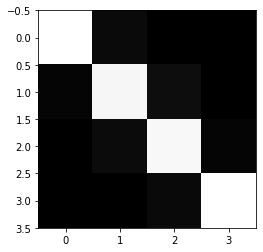

In [154]:
plt.imshow(ovo_conf_mx, cmap=plt.cm.gray)

In [113]:
recall_ovo_sgd=recall_score(y_train,ovo_pred,average='weighted')
precision_ovo_sgd=precision_score(y_train,ovo_pred,average='weighted')
f1_ovo_sgd=f1_score(y_train,ovo_pred,average='weighted')
recall_ovo_sgd,precision_ovo_sgd,f1_ovo_sgd

(0.948, 0.9485329505003572, 0.9481950318180884)

In [114]:
row = result_tab.shape[0]
result_tab.loc[row] = ['SGD_OneVsOne',ovo_accu,precision_ovo_sgd,recall_ovo_sgd,f1_ovo_sgd]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528
2,DecisionTree,0.8225,0.822251,0.8225,0.822251
3,RandomForest,0.8775,0.877092,0.8775,0.877192
4,SGD_OneVsOne,0.9530,0.948533,0.9480,0.948195


In [115]:
ovo_cls_tree=OneVsOneClassifier(DecisionTreeClassifier(random_state=42))
ovo_cls_tree.fit(X_train_scale,y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier(random_state=42))

In [116]:
ovo_tree_scores=cross_val_score(ovo_cls_tree,X_train_scale,y_train,cv=10, scoring='accuracy')
ovo_tree_accu=ovo_tree_scores.mean()
ovo_tree_accu

0.8305

In [117]:
ovo_tree_pred=cross_val_predict(ovo_cls_tree,X_train_scale,y_train, cv=10)
ovo_conf_mx=confusion_matrix(y_train,ovo_tree_pred)
ovo_conf_mx

array([[437,  60,   3,   0],
       [ 45, 394,  61,   0],
       [  0,  55, 396,  49],
       [  0,   0,  66, 434]])

In [118]:
recall_ovo_tree=recall_score(y_train,ovo_tree_pred,average='weighted')
precision_ovo_tree=precision_score(y_train,ovo_tree_pred,average='weighted')
f1_ovo_tree=f1_score(y_train,ovo_tree_pred,average='weighted')
row = result_tab.shape[0]
result_tab.loc[row] = ['DecisionTree_OneVsOne',ovo_tree_accu,precision_ovo_tree,recall_ovo_tree,f1_ovo_tree]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528
2,DecisionTree,0.8225,0.822251,0.8225,0.822251
3,RandomForest,0.8775,0.877092,0.8775,0.877192
4,SGD_OneVsOne,0.9530,0.948533,0.9480,0.948195
5,DecisionTree_OneVsOne,0.8305,0.833027,0.8305,0.831483


In [119]:
ovo_cls_forest=OneVsOneClassifier(RandomForestClassifier(random_state=42))
ovo_cls_forest.fit(X_train_scale,y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(random_state=42))

In [120]:
ovo_forest_scores=cross_val_score(ovo_cls_forest,X_train_scale,y_train,cv=10,scoring='accuracy')
ovo_forest_accu=ovo_forest_scores.mean()
ovo_forest_accu

0.8634999999999999

In [121]:
ovo_forest_pred=cross_val_predict(ovo_cls_forest,X_train_scale,y_train,cv=5)
ovo_conf_mx=confusion_matrix(y_train,ovo_forest_pred)
ovo_conf_mx

array([[463,  37,   0,   0],
       [ 32, 418,  50,   0],
       [  0,  70, 395,  35],
       [  0,   0,  59, 441]])

In [122]:
recall_ovo_forest=recall_score(y_train,ovo_forest_pred,average='weighted')
precision_ovo_forest=precision_score(y_train,ovo_forest_pred,average='weighted')
f1_ovo_forest=f1_score(y_train,ovo_forest_pred,average='weighted')
row = result_tab.shape[0]
result_tab.loc[row] = ['RandomForest_OneVsOne',ovo_forest_accu,precision_ovo_forest,recall_ovo_forest,f1_ovo_forest]
result_tab.sort_values(by = 'Accuracy', ascending=False)
result_tab

,Model,Accuracy,Precision,Recall,F1
0,Binary SGD,0.9815,0.975359,0.9500,0.962513
1,SGDClassifier,0.7765,0.774653,0.7765,0.775528
2,DecisionTree,0.8225,0.822251,0.8225,0.822251
3,RandomForest,0.8775,0.877092,0.8775,0.877192
4,SGD_OneVsOne,0.9530,0.948533,0.9480,0.948195
5,DecisionTree_OneVsOne,0.8305,0.833027,0.8305,0.831483
6,RandomForest_OneVsOne,0.8635,0.860436,0.8585,0.859201


In [ ]:
# So the best models are ReandomForestClassifier, DecisionTreeCleassifier wirh OvA method and also SGDClassifier with OvO method.